##### Problem Statement:
        gender                       : Gender of the student
        race/ethnicity               : Race of the Student As Group A/B/C
        parental level of education  : What is the education Qualification of Students Parent
        lunch                        : Whether the lunch is Standard type/Free lunch or Some discounted lunch
        test preparation course      : Whether Student has Taken or not and Completed
        math score                   : Scores in Maths
        reading score                : Scores in Reading
        writing score                : Scores in Writing
        
##### Objective of this Analysis:
        To understand the how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity,  Parental level of education, Lunch, Test preparation course).

##### What to do in  Exploratory Data Analysis:
        1) To Analyse insights in the dataset.
        2) To understand the connection between the variables and to uncover the underlying structure
        3) To extract the important Variables.
        4) To test the underlying assumptions.
        5) Provide Insights with Suitable Graphs and Visualizations.
        6) Write all your inferences with supporting Analysis and Visualizations.

In [2]:
#importing the necessary libraries

import numpy as np
#for linear algebra

import pandas as pd
#to read datasets

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#to read the datasets
data = pd.read_csv("D:/verzeo/datasets/StudentsPerformance (4).csv")

### To Understand the data and  to analyse insights in the dataset:

In [3]:
#to see all the column names, total values and type of the values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Here, we have two types of variables - Numerical variables (which have numbers as values) and Categorical values (which have description of groups or things)

In [4]:
#to see first few rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#to see last few rows
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
#to see the number of rows and columns
data.shape

(1000, 8)

the dataset containt 1000 rows and 8 columns

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Here, we can see the descriptive statistics of numerical variables such as total count, mean, standard deviation, minimum, maximum, three quantiles of the data

In [8]:
#to check unique Value count
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

In [10]:
data["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
data["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
data["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [14]:
data["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [15]:
data["reading score"].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [16]:
data["writing score"].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

Unique value count -
    One of the first things which can be useful during data exploration is to see how many unique values are there in categorical columns. This gives an idea about the data.

In [17]:
#Checking for null values in the data
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Now, we can state that we have zero null values(or, missing values). So we can proceed to the next step without changing any data.

### To understand the connection between the variables and to uncover the underlying structure:

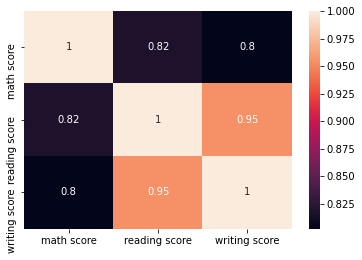

In [19]:
#to find and observe whether there is any correlation between how the students performed in the various subjects.
correlation=data.corr()
plt.rcParams['figure.figsize'] = (6, 4)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns ,annot=True)

From the heat-map, we can see that there is a strong correlation between "reading score" and "writing score"

#### Let us analyse the scores of students in math, reading and writing:

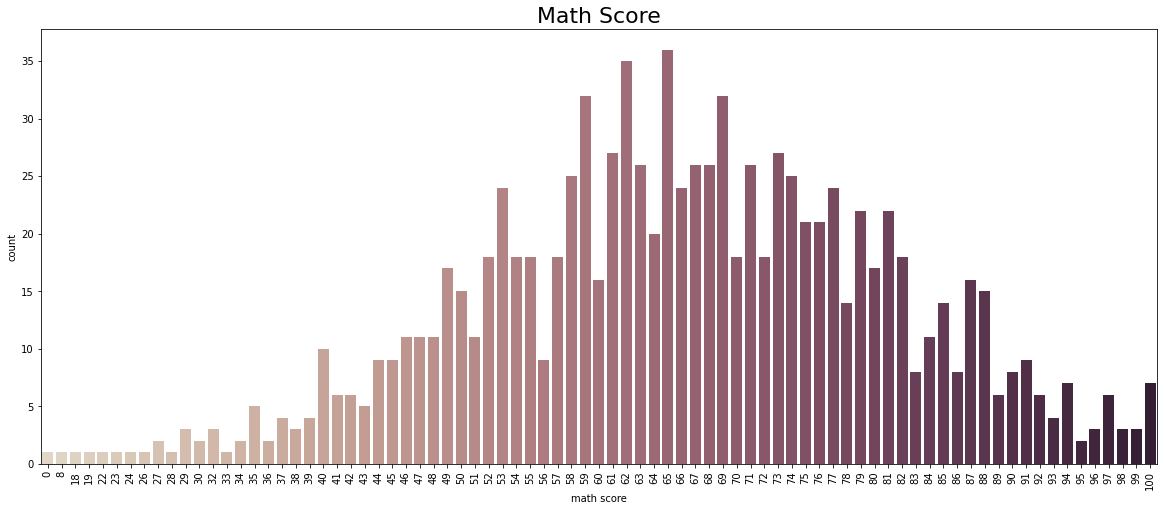

In [64]:
#scores of math
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Math Score',fontsize = 22)
q=sns.countplot(data['math score'], palette = 'ch:.25')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

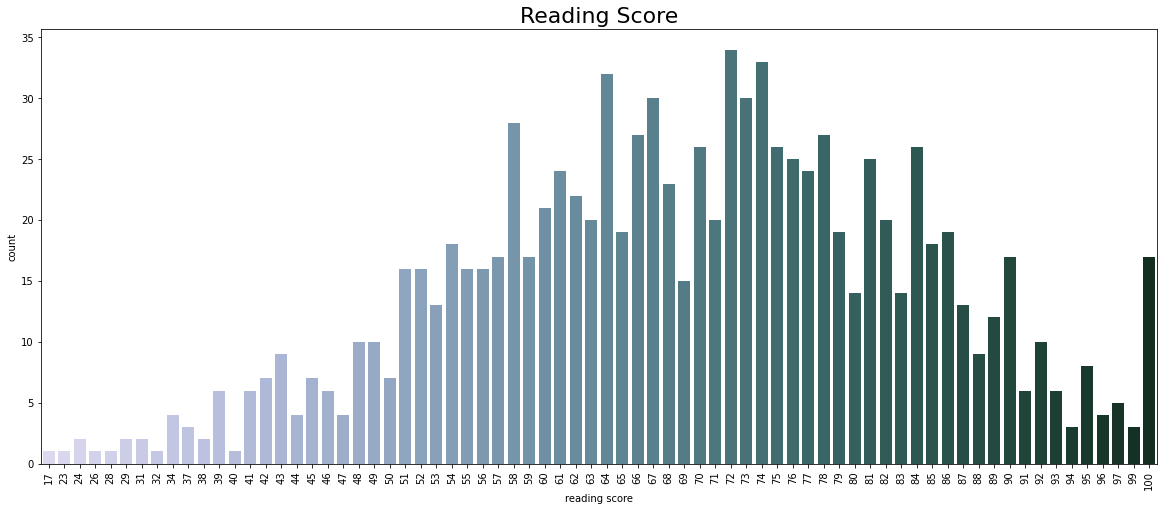

In [66]:
#scores reading
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Reading Score',fontsize = 22)
q=sns.countplot(data['reading score'], palette = 'ch:50')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

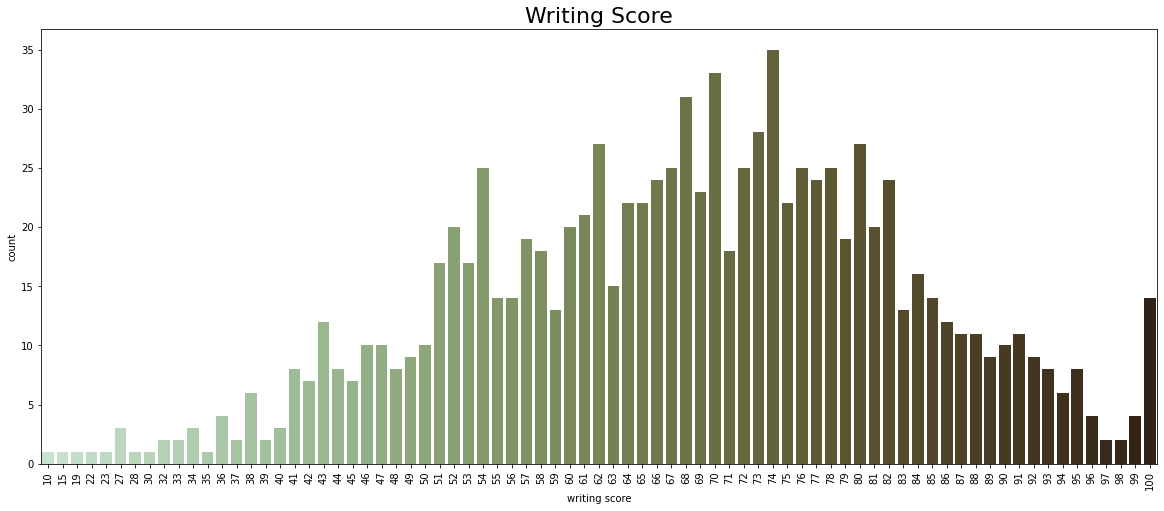

In [67]:
#scores writing
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Writing Score',fontsize = 22)
q=sns.countplot(data['writing score'], palette = 'ch:40')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

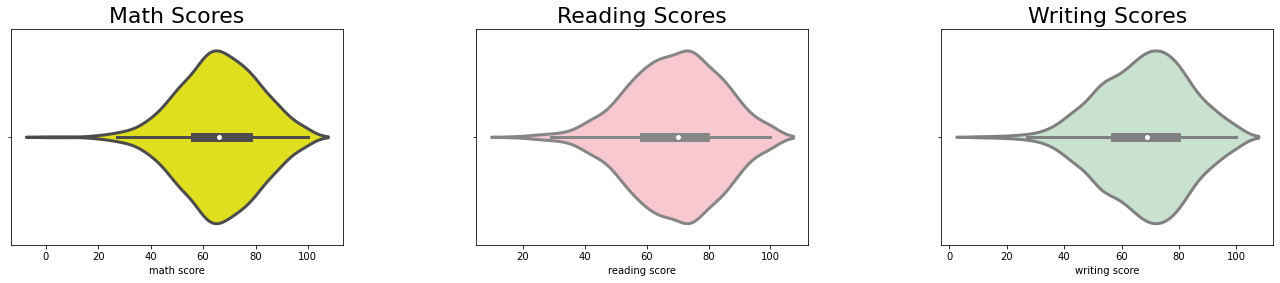

In [48]:
#analysing further using violinplot

plt.figure(figsize=(30,4))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)

plt.subplot(141)
plt.title('Math Scores', fontsize = 22)
sns.violinplot(x='math score',data=data,color='yellow',linewidth=3)

plt.subplot(142)
plt.title('Reading Scores', fontsize = 22)
sns.violinplot(x='reading score',data=data,color='pink',linewidth=3)

plt.subplot(143)
plt.title('Writing Scores', fontsize = 22)
sns.violinplot(x='writing score',data=data, palette='ch:25',linewidth=3)


plt.show()

From the above three score graph, we can condlude that most of the students have scored 60-80 in math, reading and writing.

#### Now, let's analyse the categorical values(i.e., gender, race/ethnicity, parental level of education, lunch) : 

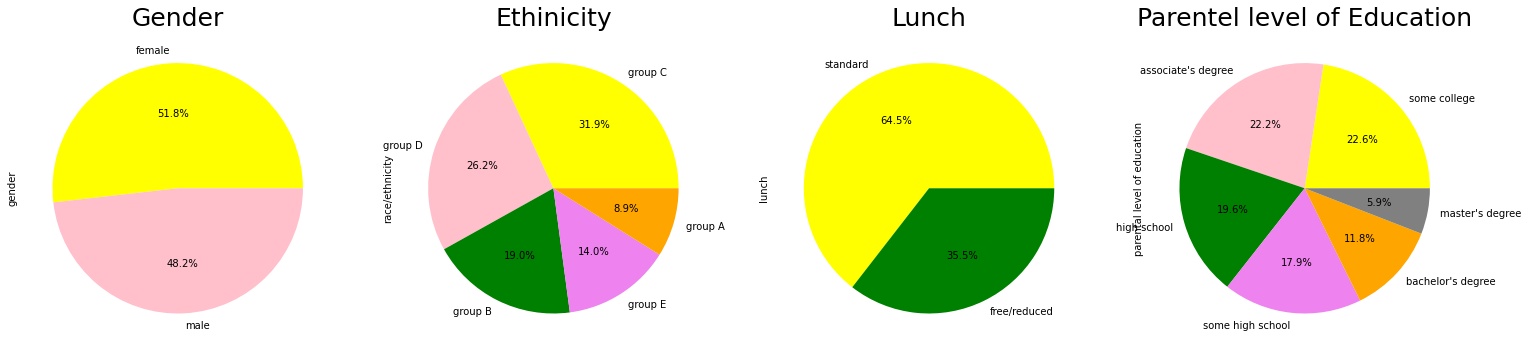

In [84]:
plt.figure(figsize=(25,30))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.2, hspace=.21)
#gender
plt.subplot(141)
plt.title('Gender',fontsize = 25)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%" , colors = ['yellow', 'pink'])
#race/ethnicity
plt.subplot(142)
plt.title('Ethinicity',fontsize = 25)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['yellow', 'pink','green', 'violet','orange'])
#lunch
plt.subplot(143)
plt.title('Lunch',fontsize = 25)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['yellow', 'green'])
#parental level of education
plt.subplot(144)
plt.title('Parentel level of Education',fontsize = 25)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%", colors = ['yellow', 'pink','green', 'violet',
                                                                                         'orange','grey'])

plt.show()

### To extract the important variables:

#### let us comapre the scores of male and female students in each subject:

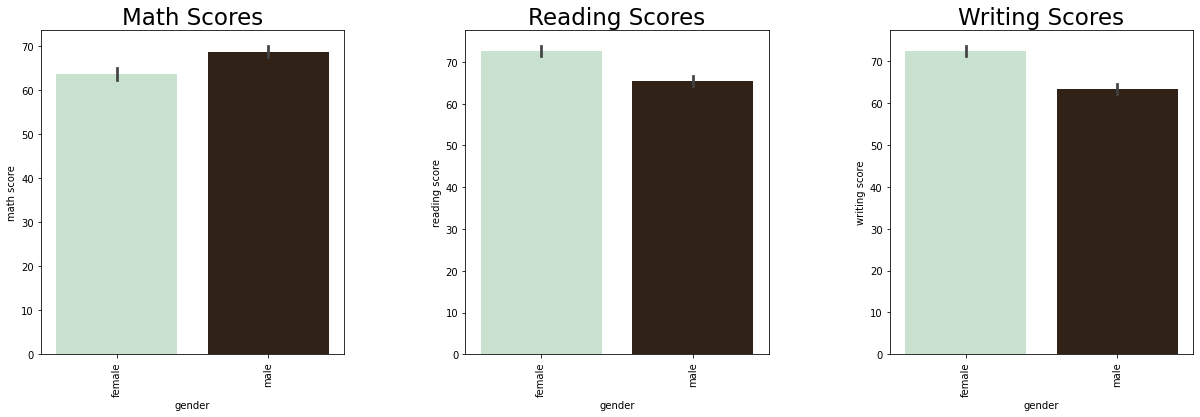

In [70]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)

#scores in maths
plt.subplot(131)
plt.title('Math Scores',fontsize=23)
q=sns.barplot(x="gender", y="math score", data=data,palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)

#Scores in reading
plt.subplot(132)
plt.title('Reading Scores', fontsize=23)
q=sns.barplot(x="gender", y="reading score", data=data, palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)

#scores in writing
plt.subplot(133)
plt.title('Writing Scores', fontsize=23)
q=sns.barplot(x="gender", y="writing score", data=data, palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

#### Now, let us see the scores of students who completed test preparation course vs who didn't :

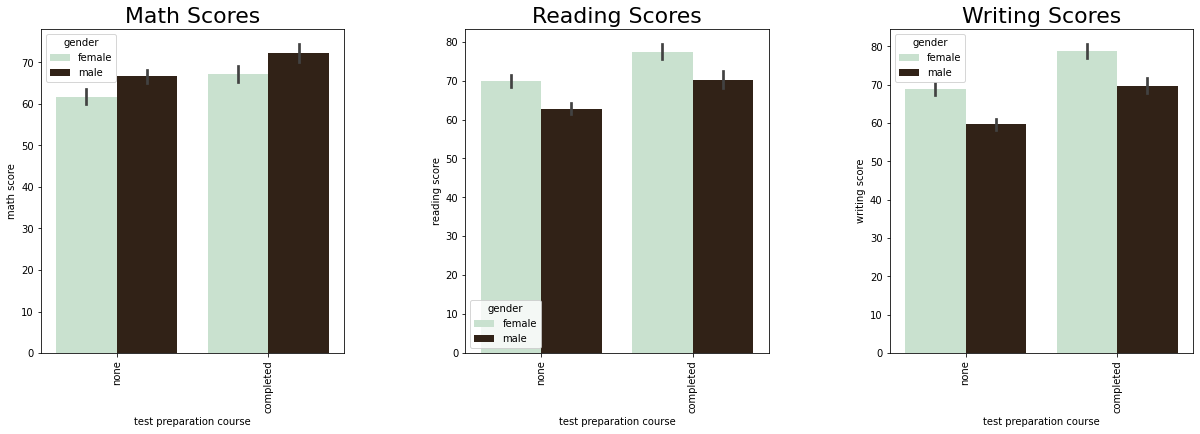

In [74]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)

plt.subplot(131)
plt.title('Math Scores',fontsize=22)
q=sns.barplot(hue="gender", x="test preparation course", y="math score", data=data, palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)

plt.subplot(132)
plt.title('Reading Scores',fontsize=22)
q=sns.barplot(hue="gender",x="test preparation course", y="reading score",  data=data, palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)

plt.subplot(133)
plt.title('Writing Scores',fontsize=22)
q=sns.barplot(hue="gender",x="test preparation course", y="writing score",  data=data, palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=90)

plt.show()

#### Test preparation course vs scores of students belong to different groups of Race/Ethnicity:

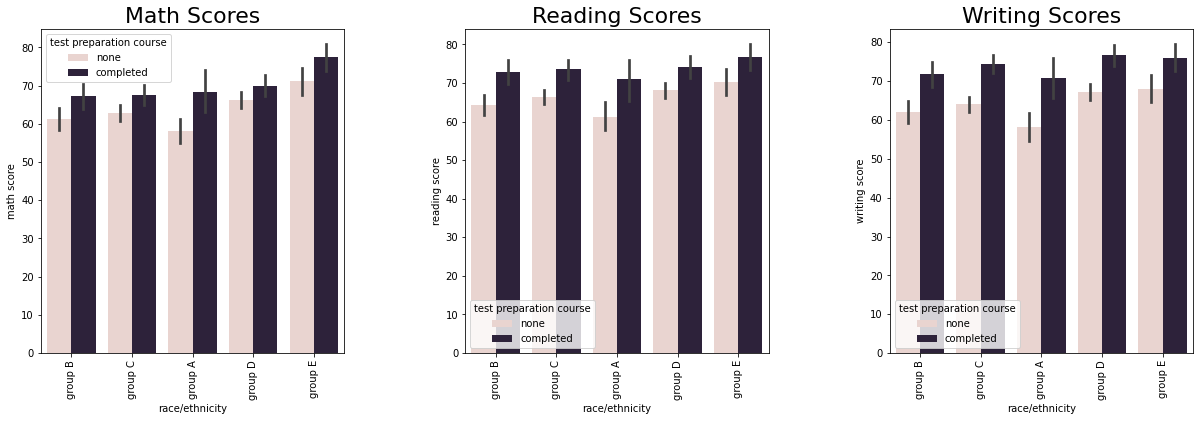

In [75]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)

plt.subplot(131)
plt.title('Math Scores',fontsize=22)
q=sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=data, palette='ch:45')
plt.setp(q.get_xticklabels(), rotation=90)

plt.subplot(132)
plt.title('Reading Scores',fontsize=22)
q=sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=data, palette='ch:45')
plt.setp(q.get_xticklabels(), rotation=90)

plt.subplot(133)
plt.title('Writing Scores',fontsize=22)
q=sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=data, palette='ch:45')
plt.setp(q.get_xticklabels(), rotation=90)

plt.show()

Already we know that students who have completed test preparation course scored highest in math and they blong to group E.From the figure, we can see that more number of students of group D and E have completed test preparation course than students of other groups.

#### Test preparation course vs Gender:

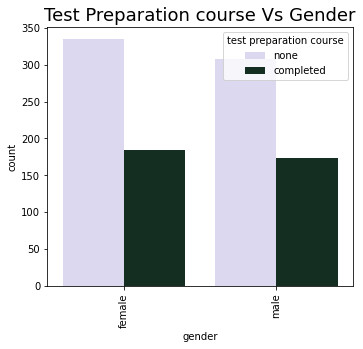

In [76]:
plt.figure(figsize=(35,12))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)
plt.subplot(251)
plt.title('Test Preparation course Vs Gender',fontsize = 18)
q=sns.countplot(hue="test preparation course", x="gender", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

Here, we can see that number of female students who hae completed test preparation course is more than that of male. Most of the students (female and male) have not completed test preparation course.

#### Test preparation course vs Lunch:

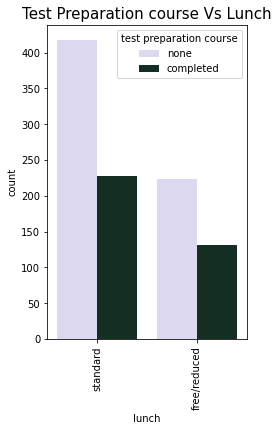

In [77]:
plt.figure(figsize=(25,12))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(252)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
q=sns.countplot(hue="test preparation course", x="lunch", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

Here, we can observe that more number of students having standard lunch have completed test preparation test than those of free/discounted students.

#### Test preparation course vs Parental level of education:

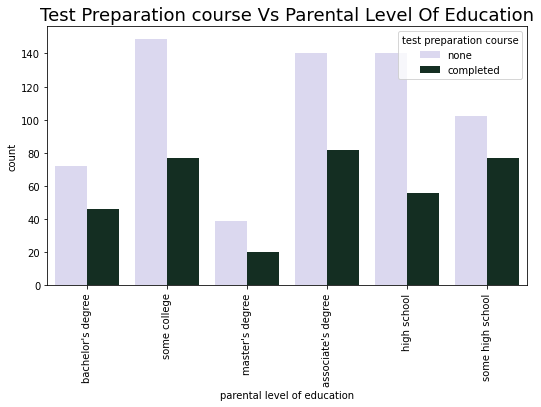

In [86]:
plt.figure(figsize=(55,12))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)
plt.subplot(253)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 18)
q=sns.countplot(hue="test preparation course", x="parental level of education", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

From the above figure, we can see that more number of students who have completed test preparation course, their parental level of education is - "Some College", "Associate's Degree"and "Some High School" .

#### Gender Vs Race/Ethnicity:

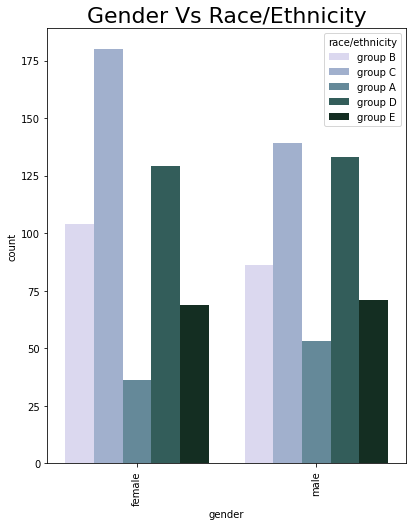

In [79]:
plt.figure(figsize=(45,8))
plt.subplot(161)
plt.title('Gender Vs Race/Ethnicity',fontsize = 22)
q=sns.countplot(x="gender", hue="race/ethnicity", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

From the above figure, we can see that more number of female and male students belong to group C.

#### Lunch vs Gender:

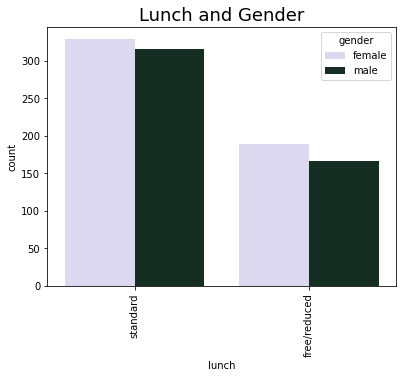

In [80]:
plt.figure(figsize=(40,12))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)
plt.subplot(251)
plt.title('Lunch and Gender',fontsize=18)
q=sns.countplot(x="lunch", hue="gender", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)

plt.show()

Here, we can see that most of the students who have standard lunch are female.

#### Race/Ethnicity vs Lunch:

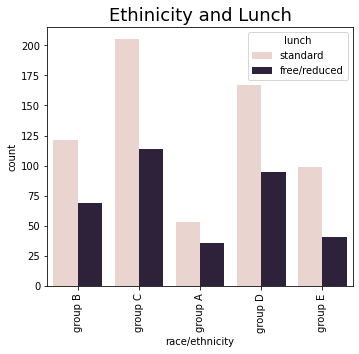

In [81]:
plt.figure(figsize=(35,12))
plt.subplots_adjust(left=0.2, bottom=.25, right=1, top=1, wspace=.4, hspace=.5)
plt.subplot(252)
plt.title('Ethinicity and Lunch',fontsize=18)
q=sns.countplot(x="race/ethnicity", hue="lunch", data=data, palette='ch:45')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

From the plot, we can say that students of group C have higher standard lunch.

### To test the underlying assumptions:

##### Let us take an assumption that students having standard lunch perform better in all sbjects than students having free/discounted lunch

In [46]:
# To prove that we need to draw the graph Lunch Vs Scores

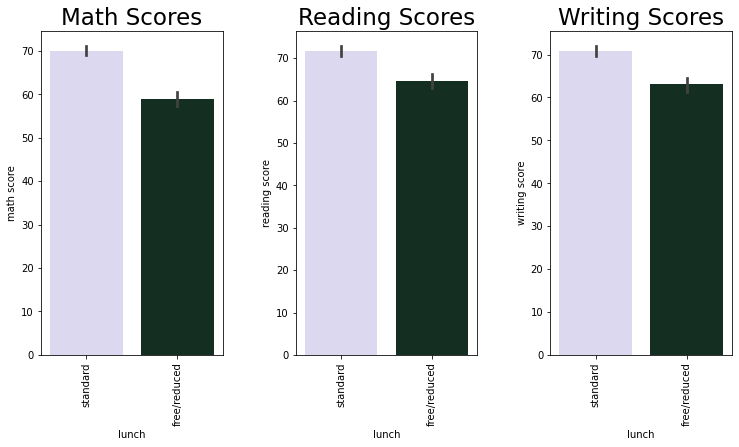

In [88]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(left=.2, bottom=.25, right=1, top=1, wspace=.4, hspace=1)

#scores in maths
plt.subplot(131)
plt.title('Math Scores',fontsize=23)
q=sns.barplot(x="lunch", y="math score", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)

#Scores in reading
plt.subplot(132)
plt.title('Reading Scores', fontsize=23)
q=sns.barplot(x="lunch", y="reading score", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)

#scores in writing
plt.subplot(133)
plt.title('Writing Scores', fontsize=23)
q=sns.barplot(x="lunch", y="writing score", data=data, palette='ch:29')
plt.setp(q.get_xticklabels(), rotation=90)
plt.show()

From the above figure, we can conclude that students having standard lunch perform better in all subjects (math, reading and writing) than students having free/discounted lunch.

#### Let us check the of no. of students who passes or failed the exam

In [4]:
data['math_Pass'] = np.where(data['math score']<30, 'F', 'P')
data['reading_Pass'] = np.where(data['reading score']<30, 'F', 'P')
data['writing_Pass'] = np.where(data['writing score']<30, 'F', 'P')

In [5]:
data['math_Pass'].value_counts()

P    986
F     14
Name: math_Pass, dtype: int64

In [6]:
data['reading_Pass'].value_counts()

P    992
F      8
Name: reading_Pass, dtype: int64

In [7]:
data['writing_Pass'].value_counts()

P    991
F      9
Name: writing_Pass, dtype: int64

Here, we can see that very vew students failed in all the exams i.e, most of the students passed the exam.

#### Now, let us compare the number of students passed the exams with parental education level:

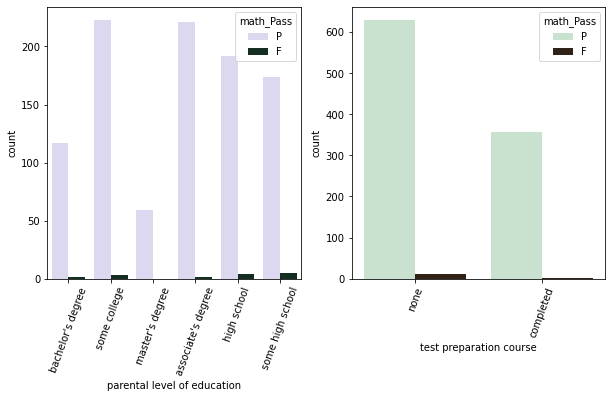

In [60]:
#Math
plt.figure(figsize=(10,5))

plt.subplot(121)
p = sns.countplot(x='parental level of education', data = data, hue='math_Pass', palette='ch:29')
plt.setp(p.get_xticklabels(), rotation=70)
plt.subplot(122)
q = sns.countplot(x='test preparation course', data = data, hue='math_Pass', palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=70)

plt.show()

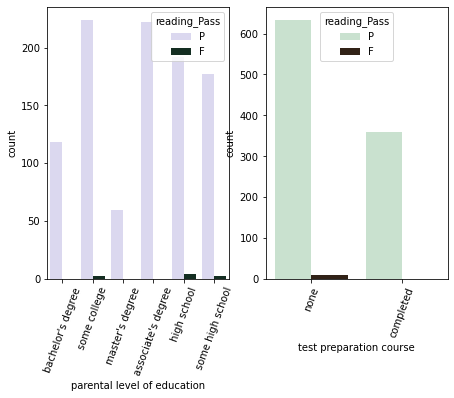

In [59]:
#reading
plt.figure(figsize=(15,5))

plt.subplot(141)
p = sns.countplot(x='parental level of education', data = data, hue='reading_Pass', palette='ch:29')
plt.setp(p.get_xticklabels(), rotation=70)
plt.subplot(142)
q = sns.countplot(x='test preparation course', data = data, hue='reading_Pass', palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=70)

plt.show()

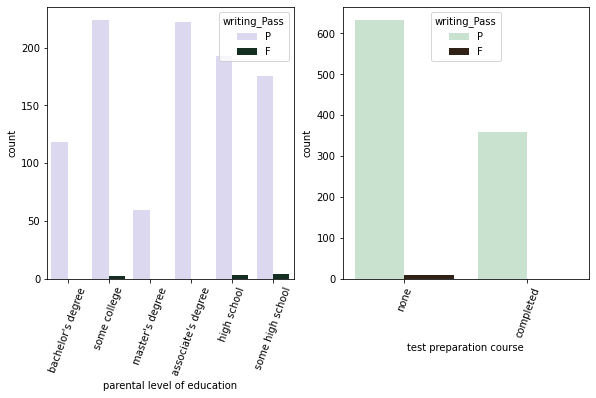

In [89]:
#writing
plt.figure(figsize=(15,5))

plt.subplot(131)
p = sns.countplot(x='parental level of education', data = data, hue='writing_Pass', palette='ch:29')
plt.setp(p.get_xticklabels(), rotation=70)

plt.subplot(132)
q = sns.countplot(x='test preparation course', data = data, hue='writing_Pass', palette='ch:25')
plt.setp(q.get_xticklabels(), rotation=70)

plt.show()

                                                   ...............

 So, we have successfully analysed the impact of differenet factors (Gender, Race/Ethnicity, Parental level of education,Lunch,Test preparation course) on student's performance (Test Scores) and observed that the above mentioned factors badly affect scores obtained by the students.

                                                  ...............